In [1]:
!pip3 install pickle5 pandas nltk tqdm

import pickle5 as pickle
import pandas as pd
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk import pos_tag

from tqdm.autonotebook import tqdm
tqdm.pandas()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/s.konkiel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-1-9c1759f761f0>:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# Load saved data
with open("../getting_started/articles_df.pkl", "rb") as fh:
    articles = pickle.load(fh)
    
articles.head()

,section_title,text,article_id
0,,"On 26 January 2010, at an ordinary airport hot...",0213936a-340f-47cf-a5e6-2ca353343a77
1,PART 2: CAN ALZHEIMER'S PREVENTION INITIATIVE ...,Reiman was not alone in thinking about such tr...,0213936a-340f-47cf-a5e6-2ca353343a77
2,PART 3: TRIALS IN COLOMBIA AND THE U.S. FOR TH...,During two recent all-day discussions with aca...,0213936a-340f-47cf-a5e6-2ca353343a77
3,"PART 4: FOR SHARED PREVENTION TRIALS, DEVIL IS...","In Phoenix, a roomful of senior industry and a...",0213936a-340f-47cf-a5e6-2ca353343a77
4,"Drug Selection: Can We Have Privacy, Please!",If anyone was hoping that representatives from...,0213936a-340f-47cf-a5e6-2ca353343a77


## Section names
There may be relationships between data citations and where in a document the citation occurs. Let's do some basic cleanup and EDA on section names, with this in mind.

In [34]:
# How many sections per article?
section_counts = articles.groupby('article_id')['section_title'].count()
section_counts.describe()

count    14316.000000
mean        18.071668
std         23.617739
min          1.000000
25%         10.000000
50%         14.000000
75%         20.000000
max       1120.000000
Name: section_title, dtype: float64

Text(0, 0.5, 'articles')

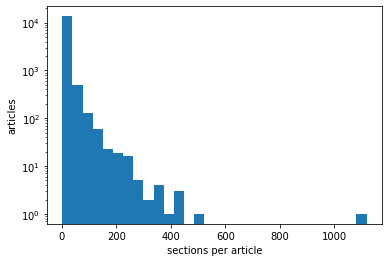

In [35]:
# How many sections per article?
plt = section_counts.plot(kind='hist', bins=30, logy=True)
plt.set_xlabel('sections per article')
plt.set_ylabel('articles')

<AxesSubplot:>

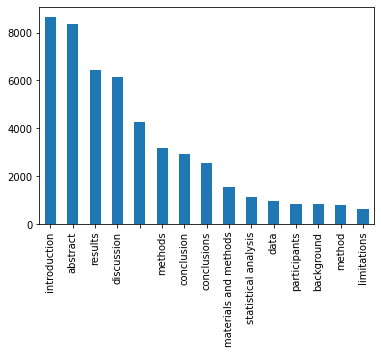

In [7]:
# quick look at section titles
articles['section_title'].str.lower().value_counts()[:15].plot(kind='bar')

In [8]:
# tokenization
def tokenize(text):
    '''prepare the text for cleaning by tokenizing strings into words'''
    try:
        sentence_list = nltk.sent_tokenize(text)
        tokenizer = nltk.RegexpTokenizer(r"\w+")
        word_list = [tokenizer.tokenize(s) for s in sentence_list]
    except:
        word_list = text
    
    return word_list

In [9]:
articles['section_title_cleaned'] = articles['section_title'].apply(lambda x: str(x)) 

import regex as re
articles['section_title_lower'] = articles['section_title_cleaned'].str.lower()
articles['section_title_cleaned'] = articles['section_title_lower'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

articles['section_title_tokenized'] = articles['section_title_cleaned'].progress_apply(word_tokenize)

articles.loc[2,'section_title_tokenized']

  0%|          | 0/258714 [00:00<?, ?it/s]

['part',
 '3',
 'trials',
 'in',
 'colombia',
 'and',
 'the',
 'us',
 'for',
 'those',
 'at',
 'highest',
 'risk']

In [10]:
# remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

articles['section_title_tokenized_stop_rem'] = articles['section_title_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/s.konkiel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# lemmatize with POS tags applied
# use spaCy to do this in a more streamlined fashion than NLTK # https://www.machinelearningplus.com/nlp/lemmatization-examples-python/#wordnetlemmatizerwithappropriatepostag

!pip3 install spacy
!spacy download en_core_web_sm

import spacy 

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

def lemmatize(l):
    '''use context-aware lemmatization from spacy on cleaned and stopword-removed tokens'''
    string = ' '.join(l) 
    doc = nlp(string)
    tokens = [token.lemma_ for token in doc]
    return tokens

articles['spacy'] = articles['section_title_tokenized_stop_rem'].progress_apply(lemmatize)

articles.head()


✘ No compatible package found for 'en_core_web_sm==3.0.0' (spaCy
v3.0.6)



  0%|          | 0/258714 [00:00<?, ?it/s]

,section_title,text,article_id,section_title_cleaned,section_title_lower,section_title_tokenized,section_title_tokenized_stop_rem,section_title_tagged,spacy
0,,"On 26 January 2010, at an ordinary airport hot...",0213936a-340f-47cf-a5e6-2ca353343a77,,,[],[],[],[]
1,PART 2: CAN ALZHEIMER'S PREVENTION INITIATIVE ...,Reiman was not alone in thinking about such tr...,0213936a-340f-47cf-a5e6-2ca353343a77,part 2 can alzheimer's prevention initiative b...,part 2: can alzheimer's prevention initiative ...,"[part, 2, can, alzheimer, 's, prevention, init...","[part, 2, alzheimer, 's, prevention, initiativ...","[(part, NN), (2, CD), (alzheimer, NN), ('s, PO...","[part, 2, alzheimer, 's, prevention, initiativ..."
2,PART 3: TRIALS IN COLOMBIA AND THE U.S. FOR TH...,During two recent all-day discussions with aca...,0213936a-340f-47cf-a5e6-2ca353343a77,part 3 trials in colombia and the us for those...,part 3: trials in colombia and the u.s. for th...,"[part, 3, trials, in, colombia, and, the, us, ...","[part, 3, trials, colombia, us, highest, risk]","[(part, NN), (3, CD), (trials, NNS), (colombia...","[part, 3, trial, colombia, we, high, risk]"
3,"PART 4: FOR SHARED PREVENTION TRIALS, DEVIL IS...","In Phoenix, a roomful of senior industry and a...",0213936a-340f-47cf-a5e6-2ca353343a77,part 4 for shared prevention trials devil is i...,"part 4: for shared prevention trials, devil is...","[part, 4, for, shared, prevention, trials, dev...","[part, 4, shared, prevention, trials, devil, d...","[(part, NN), (4, CD), (shared, VBN), (preventi...","[part, 4, share, prevention, trial, devil, det..."
4,"Drug Selection: Can We Have Privacy, Please!",If anyone was hoping that representatives from...,0213936a-340f-47cf-a5e6-2ca353343a77,drug selection can we have privacy please,"drug selection: can we have privacy, please!","[drug, selection, can, we, have, privacy, please]","[drug, selection, privacy, please]","[(drug, NN), (selection, NN), (privacy, NN), (...","[drug, selection, privacy, please]"


In [ ]:
articles.to_pickle('./interim/articles_lemmatized.pkl')

In [ ]:
# n-grams for terms in section titles

In [ ]:
'''
https://benalexkeen.com/basic-language-processing-with-nltk/
https://towardsdatascience.com/building-a-text-normalizer-using-nltk-ft-pos-tagger-e713e611db8
https://machinelearningmastery.com/clean-text-machine-learning-python/

TODO:
n-grams for terms in section titles
Check that all documents are in English
Standardize section names
Count section names

For each dataset name, find relevant sentences containing said dataset
    What section do they appear in?
    How often in each article is the dataset named?

In the "train" dataset - what are the features of articles found to have cited a dataset?
'''
    
